<a href="https://colab.research.google.com/github/pasumarthi/Backprop/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


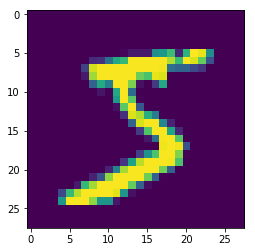

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [117]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
          

model.add(Convolution2D(16,3,3, activation='relu'))
#model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Convolution2D(16,3,3, activation='relu'))
model.add(Convolution2D(10,3,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to 

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 24, 24, 16)        272       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 10, 10, 16)        272       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [141]:
model.fit(X_train, Y_train, batch_size=512,nb_epoch=30, verbose=1,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 4s 79us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0243 - val_acc: 0.9928
Epoch 2/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0295 - acc: 0.9906 - val_loss: 0.0228 - val_acc: 0.9938
Epoch 3/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0270 - acc: 0.9908 - val_loss: 0.0232 - val_acc: 0.9937
Epoch 4/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0274 - acc: 0.9909 - val_loss: 0.0232 - val_acc: 0.9938
Epoch 5/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0233 - val_acc: 0.9938
Epoch 6/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0219 - val_acc: 0.9945
Epoch 7/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0234 - val_acc:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [143]:
print(score)

[0.018919561850500758, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [145]:
print(y_pred[:9])
print(y_test[:9])

[[3.9464221e-17 2.2040156e-12 1.0109131e-09 2.2137101e-08 7.9990810e-15
  1.5265655e-13 1.3122610e-22 1.0000000e+00 9.5691692e-12 9.4540697e-10]
 [5.1281199e-06 2.3066264e-06 9.9999177e-01 7.3457969e-08 1.5387696e-09
  1.3309975e-10 6.2535662e-08 7.3727153e-09 6.3063209e-07 2.1884430e-09]
 [2.9353478e-08 9.9990666e-01 6.9295652e-07 2.6322952e-10 2.2486689e-05
  2.1821675e-07 5.7731290e-07 6.9045971e-05 1.6208344e-07 3.5056146e-08]
 [9.9999225e-01 2.3328431e-15 7.4193849e-07 4.5872559e-09 5.6190597e-10
  2.1625106e-09 2.5711561e-06 6.1578000e-09 5.7772860e-07 3.8435455e-06]
 [4.5615980e-11 1.2947998e-10 3.1247587e-09 6.7694944e-13 9.9999177e-01
  7.5516573e-13 6.9856880e-09 2.2960484e-11 2.3595514e-09 8.2600864e-06]
 [4.7161657e-09 9.9975401e-01 8.6655501e-07 9.5749624e-11 6.3749205e-05
  5.9726273e-09 7.1077601e-08 1.8115189e-04 8.1612662e-08 6.6283967e-08]
 [3.2870201e-19 1.2410134e-09 4.2435616e-10 3.1555776e-12 9.9993908e-01
  5.9778099e-10 2.8195168e-12 3.8756639e-08 2.7067534e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [147]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored